<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

# Proyecto: California WildFires

## Etapa de proyecto:  Resultados finales

__Profesor__:  

Alonso Ogueda O.

__Integrantes__:   
               
- Pilar Cerda M.  <br>__Rol__: 201504079-6 
- Ian Mancilla W.  <br>  __Rol__: 201584032-6
- Alvaro Marambio V. <br> __Rol__: 782020203-6 

##  Prediciendo Incendios de California


 El estado de California en Estados Unidos es uno de los lugares con las temporadas de incendios forestales más mortíferas y destructivas. El conjunto de datos contiene la lista de incendios forestales que ocurrieron en California entre 2013 y 2019. En concreto, se incluye la ubicación donde ocurrieron los incendios forestales, el nombre del condado, 
los valores de latitud y longitud, y también detalles sobre cuándo comenzó el incendio forestal.

A partir de los datos, se desea poder predecir con un modelo de Machine Learning una aproximación a los futuros siniestros <br>
con la mayor presición de acuerdo a las variables disponibles de interés.

<img src="https://static01.nyt.com/images/2020/09/08/science/08CLI-CALFIRES-update/merlin_176700381_709524cd-fbfe-499c-af77-596f80821067-superJumbo.jpg?quality=90&auto=webp" width="700" height="700">


El incendio de Creek en el condado de Madera, California. Créditos Josh Edelson / Agence France-Presse - Getty Images. [INCENDIO DE CREEK](https://www.nytimes.com/article/why-does-california-have-wildfires.html).

### Objetivos

Aplicar y evaluar un modelo de Machine Learning a un caso de estudio real, de interés para trabajar.

En esta etapa de propuesta de proyecto se contempla:

* La presentación del trabajo ya realizado, con los arreglos realizados.
* El análisis estadístico de la data y visualización de variables.
* Se presenta el preprocesamiento para los modelos de ML
* Se selecciona un modelo según los resultados de las métricas 
* Entender los resultados de los modelos estudiados

### Resultados finales

1. Definición del problema (5 puntos)
2. Estadística descriptiva (5 puntos)
3. Visualización descriptiva (10 puntos)
4. Preprocesamiento (20 puntos
5. Selección de modelo (35 puntos)
    1. Por lo menos debe comparar cuatro modelos
    2. Al menos tres de estos modelos tienen que tener hiperparámetros.
    3. Realizar optimización de hiperparámetros.
6. Métricas y análissi de resultaods (10 puntos)
7. Visualizaciones del modelo (10 puntos)
8. Conclusiones (5 puntos)

## 1. Definición del problema (5 puntos)

¿Cuál será el impacto en superficie quemada dentro de los próximos años según ubicación y tiempo en California?

<div id='pres_date' />

### Presentación de los datos y definición de variables

Primero se hace la importación de las librerías y funciones pertinentes

In [1]:
import os
import scipy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import altair as alt
import ipywidgets as widgets  
from datetime import date 
from ipywidgets import interactive, interact

import warnings 

# Plotting Libraries 

import matplotlib.pyplot as plt 

import matplotlib.style as style 

# Seaborn Library Setting 

import seaborn as sns 

from pathlib import Path
from PIL import Image

alt.themes.enable('opaque') 

%matplotlib inline

#### A continuación se presentan los datos y la definición de variables para el problema en estudio

In [2]:
Fire = pd.read_csv(os.path.join("..","data", "California_Fire_Incidents.csv"))

Fire.head()

AcresBurned  Active                                          AdminUnit  \
0     257314.0   False  Stanislaus National Forest/Yosemite National Park   
1      30274.0   False  USFS Angeles National Forest/Los Angeles Count...   
2      27531.0   False  CAL FIRE Riverside Unit / San Bernardino Natio...   
3      27440.0   False                              Tahoe National Forest   
4      24251.0   False                       Ventura County Fire/CAL FIRE   

   AirTankers  ArchiveYear  CalFireIncident  \
0         NaN         2013             True   
1         NaN         2013             True   
2         NaN         2013             True   
3         NaN         2013            False   
4         NaN         2013             True   

                            CanonicalUrl  \
0         /incidents/2013/8/17/rim-fire/   
1  /incidents/2013/5/30/powerhouse-fire/   
2    /incidents/2013/7/15/mountain-fire/   
3    /incidents/2013/8/10/american-fire/   
4      /incidents/2013/5/2/springs-fire/   

                                  ConditionStatement ControlStatement  \
0                                                NaN              NaN   
1                                                NaN              NaN   
2                                                NaN              NaN   
3                                                NaN              NaN   
4  Acreage has been reduced based upon more accur...              NaN   

      Counties  ...                                     SearchKeywords  \
0     Tuolumne  ...  Rim Fire, Stanislaus National Forest, Yosemite...   
1  Los Angeles  ...  Powerhouse Fire, May 2013, June 2013, Angeles ...   
2    Riverside  ...  Mountain Fire, July 2013, Highway 243, Highway...   
3       Placer  ...  American Fire, August 2013, Deadwood Ridge, Fo...   
4      Ventura  ...  Springs Fire, May 2013, Highway 101, Camarillo...   

                Started     Status  StructuresDamaged StructuresDestroyed  \
0  2013-08-17T15:25:00Z  Finalized                NaN                 NaN   
1  2013-05-30T15:28:00Z  Finalized                NaN                 NaN   
2  2013-07-15T13:43:00Z  Finalized                NaN                 NaN   
3  2013-08-10T16:30:00Z  Finalized                NaN                 NaN   
4  2013-05-02T07:01:00Z  Finalized                6.0                10.0   

   StructuresEvacuated  StructuresThreatened  \
0                  NaN                   NaN   
1                  NaN                   NaN   
2                  NaN                   NaN   
3                  NaN                   NaN   
4                  NaN                   NaN   

                               UniqueId               Updated  WaterTenders  
0  5fb18d4d-213f-4d83-a179-daaf11939e78  2013-09-06T18:30:00Z           NaN  
1  bf37805e-1cc2-4208-9972-753e47874c87  2013-06-08T18:30:00Z           NaN  
2  a3149fec-4d48-427c-8b2c-59e8b79d59db  2013-07-30T18:00:00Z           NaN  
3  8213f5c7-34fa-403b-a4bc-da2ace6e6625  2013-08-30T08:00:00Z           NaN  
4  46731fb8-3350-4920-bdf7-910ac0eb715c  2013-05-11T06:30:00Z          11.0  

[5 rows x 40 columns]

##### Se redefine la unidad de la variable target

In [3]:
Fire["CountyIds"]

0       55
1       19
2       33
3       31
4       56
        ..
1631    33
1632    29
1633    57
1634    37
1635    33
Name: CountyIds, Length: 1636, dtype: object

In [4]:
#Inicialmente se cambia columna de Acres a hectáreas por comodidad de unidades, que será el target a analizar: 
Fire["Hectareas"]=Fire["AcresBurned"]/2.4711  

#(Luego se dropea Acres) 
Fire=Fire.drop(axis=1, columns="AcresBurned") 

##### Se definen nuevas variables temporales 

In [5]:
#Se cambia fecha a formato datetime y se ordena por año mes y día.  
dt=pd.DatetimeIndex(Fire.Started)  

#Se cambia el formato de tiempo a datetime (a Extinguished al igual que a Started): 
Fire.Extinguished=pd.to_datetime(Fire.Extinguished)

Fire["Mes"]=dt.month  #Se incluye variable de los meses

Fire["Mes"]=Fire["Mes"].dropna(axis=0, inplace=False) 

Fire["Año"]=dt.year  #Se repite columna según lo registrado en Started que es más confiable

Fire["Año"]=Fire["Año"].dropna(axis=0, inplace=False) 

Fire["Dia"]=dt.day   #Se incluyen los días para posterior separación según temporadas

Fire["Dia"]=Fire["Dia"].dropna(axis=0, inplace=False)

Fire["Hora"]=dt.hour   #De la misma manera, se estudiarán los rangos horarios y su influencia estadística en el target

Fire["Hora"]=Fire["Hora"].dropna(axis=0, inplace=False)

Fire["Fecha"]=pd.to_datetime(Fire["Started"]).dt.date

Fire["Fecha"]= pd.to_datetime(Fire["Fecha"]).dt.normalize()  #Se restaura formato pero con el display modificado

In [6]:
Fire.isnull().sum()  #Se revisan los datos nulos de cada columna

Active                     0
AdminUnit                  0
AirTankers              1608
ArchiveYear                0
CalFireIncident            0
CanonicalUrl               0
ConditionStatement      1352
ControlStatement        1525
Counties                   0
CountyIds                  0
CrewsInvolved           1465
Dozers                  1513
Engines                 1445
Extinguished              59
Fatalities              1615
Featured                   0
Final                      0
FuelType                1624
Helicopters             1552
Injuries                1516
Latitude                   0
Location                   0
Longitude                  0
MajorIncident              0
Name                       0
PercentContained           3
PersonnelInvolved       1432
Public                     0
SearchDescription         17
SearchKeywords           203
Started                    0
Status                     0
StructuresDamaged       1569
StructuresDestroyed     1461
StructuresEvac

Fire.isnull().sum()

In [7]:
Fire.dtypes   #Se revisan los tipos de datos de cada columna

Active                                 bool
AdminUnit                            object
AirTankers                          float64
ArchiveYear                           int64
CalFireIncident                        bool
CanonicalUrl                         object
ConditionStatement                   object
ControlStatement                     object
Counties                             object
CountyIds                            object
CrewsInvolved                       float64
Dozers                              float64
Engines                             float64
Extinguished            datetime64[ns, UTC]
Fatalities                          float64
Featured                               bool
Final                                  bool
FuelType                             object
Helicopters                         float64
Injuries                            float64
Latitude                            float64
Location                             object
Longitude                       

#### Las variables a analizar son:

* Hectáreas, como variable target, en unidad de hectáreas quemadas registradas de cada incendio
* Counties: Son los condados de California en que ocurrió cada siniestro
* Started: Fecha y hora de inicio de cada incendio
* Extinguished: Registro de tiempo en que se extinguió el incendio
* Latitude: Coordenada de latitud del incidente, en grados decimales
* Longitude: Coordenada de longitud del incidente, en grados decimales
* Fecha: Fecha datetime en que ocurrió cada registro (incluye el año, por lo que esa variable se analizará desde esta)
* Mes: Mes de la fecha (0, 12)
* Hora: Hora de la fecha (0, 24)


## 2. Estadística descriptiva (5 puntos)

<div id='estad' />

### Análisis estadístico de los datos

A continuación se presenta un análisis estadístico de los datos escogidos para el análisis del problema en estudio

In [8]:
Fire.describe(include="all",datetime_is_numeric='True').T

count unique  \
Active                1636      1   
AdminUnit             1636    494   
AirTankers              28    NaN   
ArchiveYear           1636    NaN   
CalFireIncident       1636      2   
CanonicalUrl          1636   1607   
ConditionStatement     284    258   
ControlStatement       111     92   
Counties              1636     59   
CountyIds             1636     79   
CrewsInvolved          171    NaN   
Dozers                 123    NaN   
Engines                191    NaN   
Extinguished          1577    NaN   
Fatalities              21    NaN   
Featured              1636      2   
Final                 1636      2   
FuelType                12      8   
Helicopters             84    NaN   
Injuries               120    NaN   
Latitude              1636    NaN   
Location              1636   1606   
Longitude             1636    NaN   
MajorIncident         1636      2   
Name                  1636   1193   
PercentContained      1633    NaN   
PersonnelInvolved      204    NaN   
Public                1636      1   
SearchDescription     1619   1591   
SearchKeywords        1433   1382   
Started               1636   1597   
Status                1636      2   
StructuresDamaged       67    NaN   
StructuresDestroyed    175    NaN   
StructuresEvacuated      0    NaN   
StructuresThreatened    30    NaN   
UniqueId              1636   1609   
Updated               1636   1134   
WaterTenders           146    NaN   
Hectareas             1633    NaN   
Mes                   1636    NaN   
Año                   1636    NaN   
Dia                   1636    NaN   
Hora                  1636    NaN   
Fecha                 1636    NaN   

                                                                    top  freq  \
Active                                                            False  1636   
AdminUnit                                CAL FIRE Sonoma-Lake-Napa Unit    89   
AirTankers                                                          NaN   NaN   
ArchiveYear                                                         NaN   NaN   
CalFireIncident                                                    True  1251   
CanonicalUrl          /incidents/2018/7/27/ranch-fire-mendocino-comp...     4   
ConditionStatement    Current Situation: 28 remote wildland fires, r...     4   
ControlStatement                    All road closures have been lifted.     9   
Counties                                                      Riverside   146   
CountyIds                                                            33   145   
CrewsInvolved                                                       NaN   NaN   
Dozers                                                              NaN   NaN   
Engines                                                             NaN   NaN   
Extinguished                                                        NaN   NaN   
Fatalities                                                          NaN   NaN   
Featured                                                          False  1610   
Final                                                              True  1634   
FuelType                                                          Grass     4   
Helicopters                                                         NaN   NaN   
Injuries                                                            NaN   NaN   
Latitude                                                            NaN   NaN   
Location              off Highway 20 near Potter Valley, northeast o...     4   
Longitude                                                           NaN   NaN   
MajorIncident                                                     False  1253   
Name                                                         Creek Fire    15   
PercentContained                                                    NaN   NaN   
PersonnelInvolved                                                   NaN   NaN   
Public                                            

In [9]:
Fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Active                1636 non-null   bool               
 1   AdminUnit             1636 non-null   object             
 2   AirTankers            28 non-null     float64            
 3   ArchiveYear           1636 non-null   int64              
 4   CalFireIncident       1636 non-null   bool               
 5   CanonicalUrl          1636 non-null   object             
 6   ConditionStatement    284 non-null    object             
 7   ControlStatement      111 non-null    object             
 8   Counties              1636 non-null   object             
 9   CountyIds             1636 non-null   object             
 10  CrewsInvolved         171 non-null    float64            
 11  Dozers                123 non-null    float64            
 12  Engine

### __Análisis de distribución de datos visualizando los boxplots__

Outliers en  CrewsInvolved : 10
Outliers en  Dozers : 18
Outliers en  Engines : 11
Outliers en  Fatalities : 3
Outliers en  Hectareas : 252
Outliers en  Helicopters : 12
Outliers en  Injuries : 4
Outliers en  Latitude : 161
Outliers en  Longitude : 163
Outliers en  PersonnelInvolved : 11
Outliers en  StructuresDamaged : 8
Outliers en  StructuresDestroyed : 22
Outliers en  WaterTenders : 17
Outliers en  Mes : 0
Outliers en  Dia : 0
Outliers en  Hora : 0


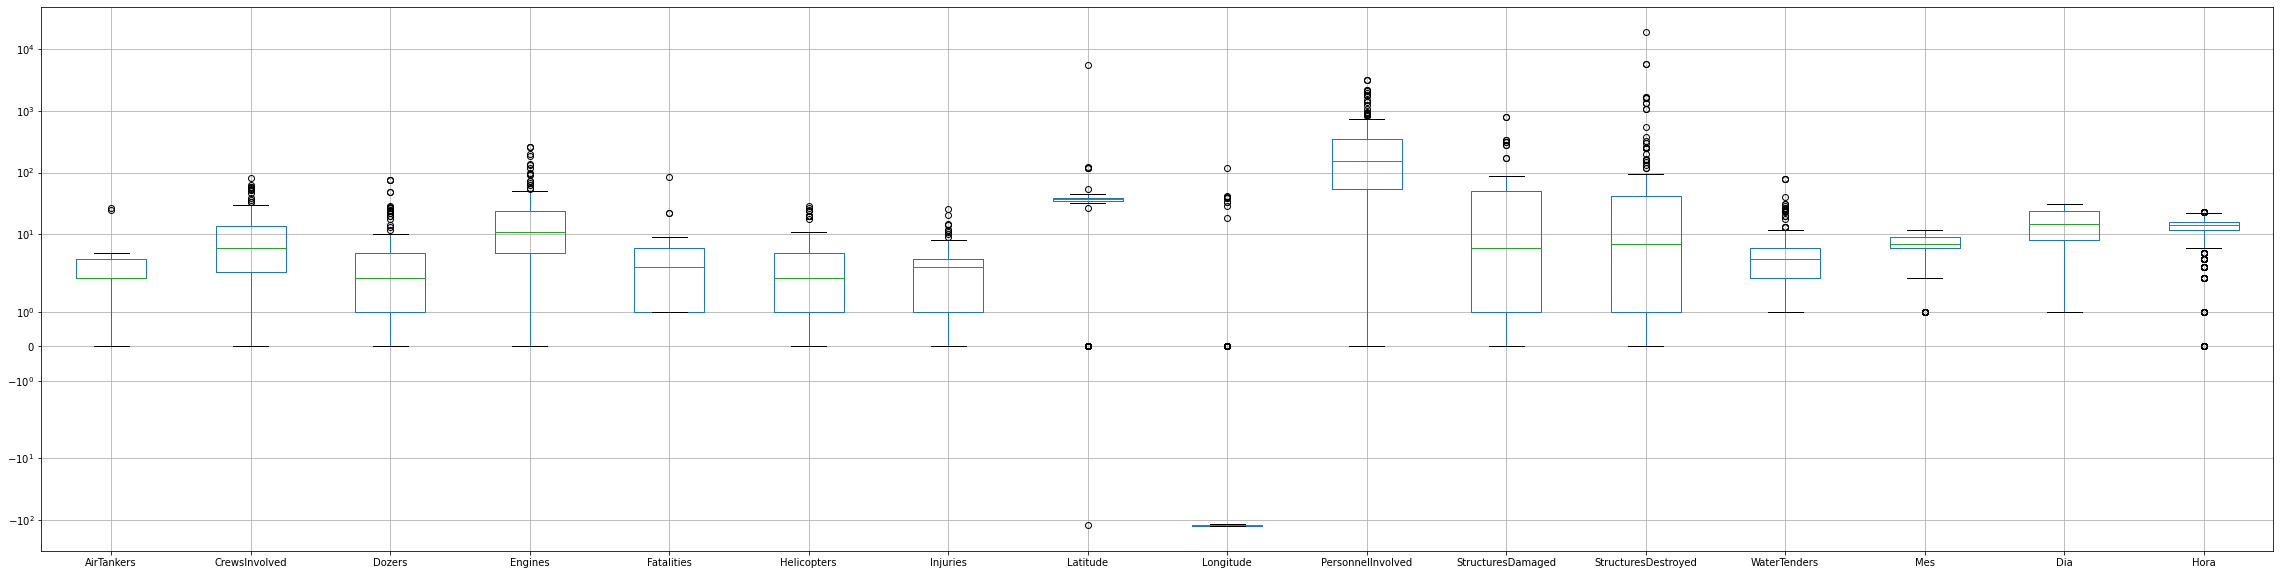

In [10]:
#Box plot : df es base de datos originales  

plt.figure(figsize=(40,10)) 

plt.yscale('symlog') 

Fire.boxplot(column=["AirTankers","CrewsInvolved","Dozers","Engines","Fatalities","Helicopters","Injuries","Latitude","Longitude",
                     "PersonnelInvolved","StructuresDamaged","StructuresDestroyed","WaterTenders","Mes", "Dia", "Hora"],) 

Q1=Fire.describe().T['25%'] 

Q3=Fire.describe().T['75%'] 

RIQ=Q3-Q1 

LI=Q1-3*RIQ 

LS=Q3+3*RIQ 

colum=["CrewsInvolved","Dozers","Engines","Fatalities","Hectareas","Helicopters","Injuries","Latitude","Longitude",
       "PersonnelInvolved","StructuresDamaged","StructuresDestroyed","WaterTenders","Mes","Dia", "Hora"] 

for col in colum: 

    k=0 

    for i in Fire[col]: 

        if i<LI[col] or i>LS[col]: 

            k+=1         

    print('Outliers en ', col,':',k) 

#### Se revisan las variables temporales

In [11]:
#Se revisan los valores de cada columna 
a=Fire.loc[:,"Dia"].unique() 

print(sorted(a)) 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [12]:
b=Fire.loc[:,"Mes"].unique() 

print(sorted(b)) 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [13]:
c=Fire.loc[:,"Año"].unique() 

print(sorted(c)) 

[1969, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [14]:
Fire= Fire[Fire.Año != 1969] #Se elimina año que no aporta al análisis
c=Fire.loc[:,"Año"].unique()
print(sorted(c))

[2013, 2014, 2015, 2016, 2017, 2018, 2019]


#### Se hace un análisis estacional para comprender la recurrencia de incendios por cada temporada de California

__Agrupación por temporadas:__
   <p> Primavera: desde el 21 de marzo al 20 de junio. </p>
    <p>Verano: desde el 21 de junio al 22 de septiembre. </p>
    <p>Otoño: desde el 23 de septiembre al 20 de diciembre. </p>
    <p>Invierno: desde el 21 de diciembre al 20 de marzo.</p>

In [15]:
date = Fire.Fecha.dt.month*100 + Fire.Fecha.dt.day
Fire['Estacion'] = (pd.cut(date,[0,321,620,922,1220,1300],
                       labels=['Invierno','Primavera','Verano','Otoño','Invierno '])
                  .str.strip())

Fire['date_offset'] = (Fire.Fecha.dt.month*100 + Fire.Fecha.dt.day - 320)%1300

Fire['Estacion'] = pd.cut(Fire['date_offset'], [0, 300, 602, 900, 1300], 
                           labels=['Primavera', 'Verano', 'Otoño', 'Invierno'])

Fire=Fire.drop(["date_offset", "Dia"], axis=1) #Se borran columnas de date_offset y Dia que ya no son útiles
Fire.loc[:,"Estacion"]

0          Verano
1       Primavera
2          Verano
3          Verano
4       Primavera
          ...    
1631        Otoño
1632       Verano
1633        Otoño
1634        Otoño
1635        Otoño
Name: Estacion, Length: 1634, dtype: category
Categories (4, object): ['Primavera' < 'Verano' < 'Otoño' < 'Invierno']

In [16]:
Fire["Estacion"].value_counts()

Verano       968
Primavera    391
Otoño        247
Invierno      28
Name: Estacion, dtype: int64

## 3. Visualización descriptiva (10 puntos)
##### A continuación presentamos la visualización de variables del problema en estudio

In [17]:
Condados= Fire["Counties"].value_counts().index 
Recurrencia= Fire["Counties"].value_counts().values

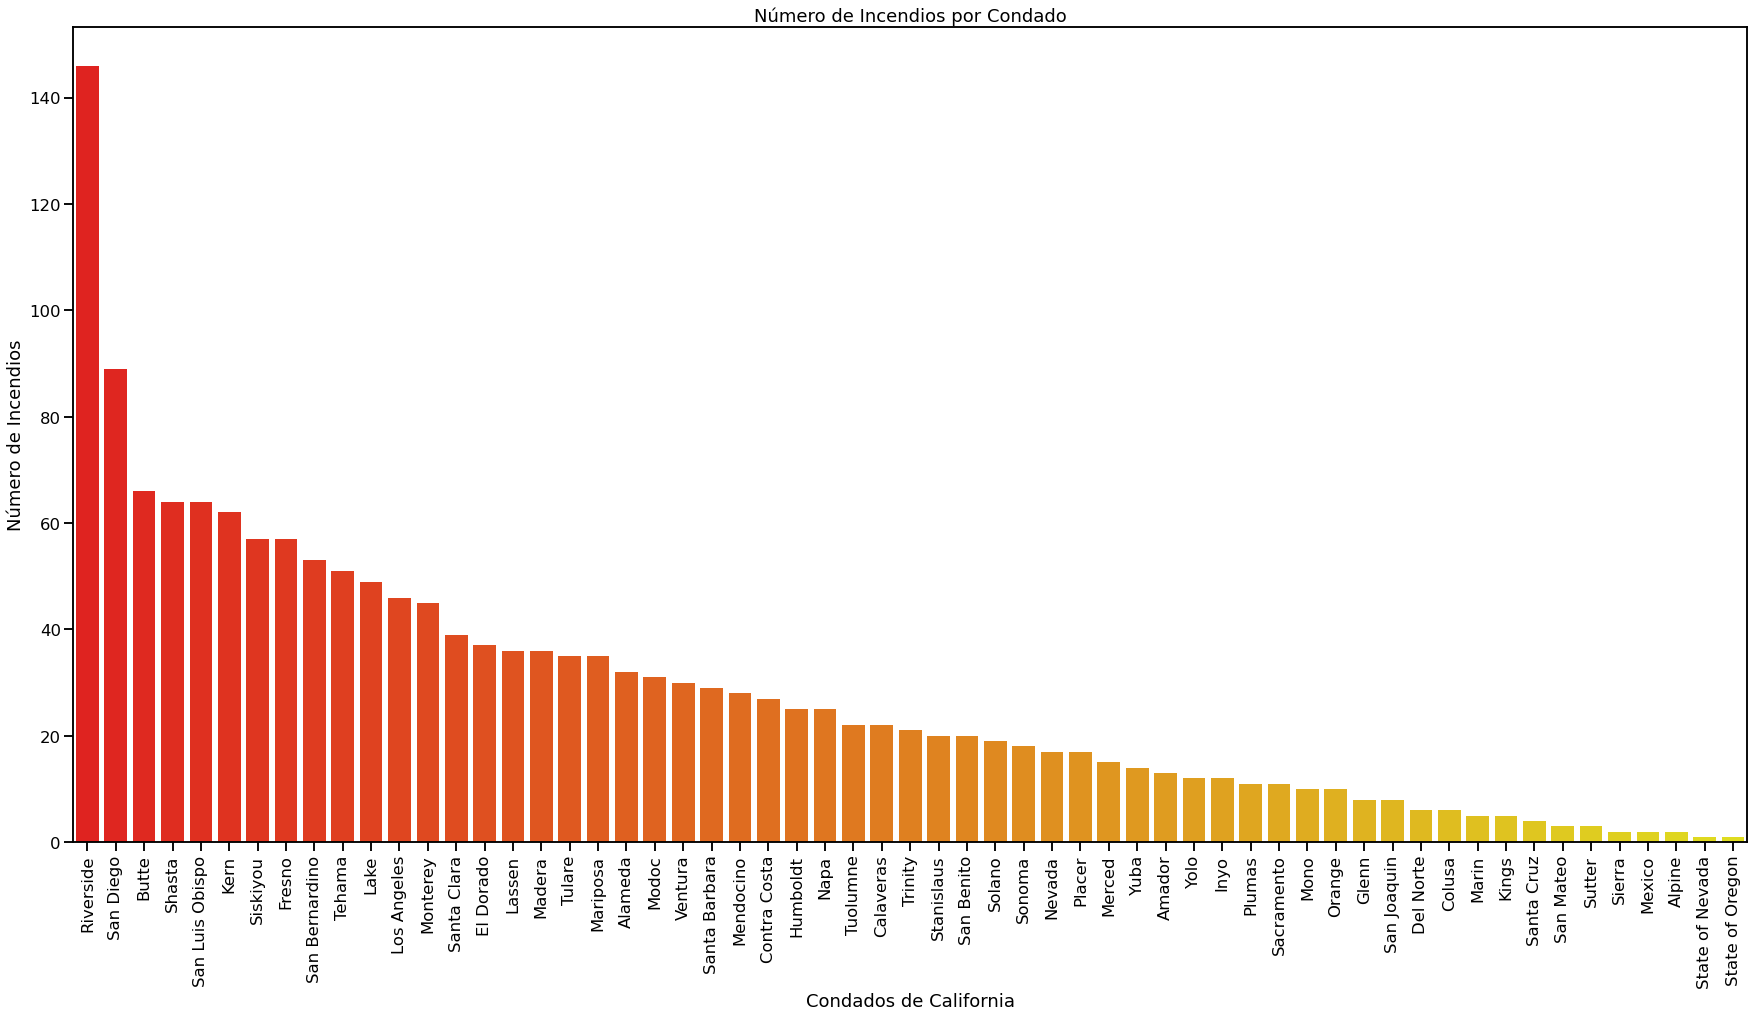

In [18]:
plt.figure(figsize=(30,15)) 

sns.set_context("talk") 

g=sns.barplot( x =Condados , y=Recurrencia, palette  = "autumn"); 

plt.title('Número de Incendios por Condado') 

plt.xlabel('Condados de California') 
plt.ylabel('Número de Incendios') 

plt.xticks(rotation=90) 
warnings.filterwarnings("ignore") 

##### En primer lugar se grafican las hectáreas quemadas vs tiempo y según las estaciones del año de California 

In [19]:
Hectareasfecha=alt.Chart(Fire).mark_bar().encode(
    x=alt.X('Fecha:T', axis=alt.Axis(title="Fecha, año")),
    y=alt.Y('Hectareas:Q', axis=alt.Axis(title='Área quemada, ha')),
    tooltip=[alt.Tooltip('Hectareas',title="Hectáreas"), alt.Tooltip("Fecha",title="Fecha")]).properties(title="Hectáreas Quemadas vs Tiempo ",
    width=400, 
    height=400).interactive()
Hectareasest=alt.Chart(Fire).mark_bar().encode(
    x=alt.X('Estacion:N', axis=alt.Axis(title="Estación")),
    y=alt.Y('Hectareas:Q', axis=alt.Axis(title='Área quemada, ha')),
    tooltip=[alt.Tooltip('Hectareas',title="Hectáreas"), alt.Tooltip("Fecha",title="Fecha")]).properties(title="Hectáreas Quemadas vs Temporada",
    width=400, 
    height=400).interactive()

Hectareasfecha | Hectareasest

alt.HConcatChart(...)

Se nota que es necesario hacer una estandarización de los datos al notar el primer gráfico, donde en algunos siniestros el área quemada <br> fue muy superior al promedio

In [20]:
ninc=Fire["Estacion"].value_counts().to_frame(name="Incendios") #Se genera data para visualizar los incendios por cada estación del año
ninc=ninc.reset_index() 
ninc["index"]=ninc["index"].astype(str)
ninc

index  Incendios
0     Verano        968
1  Primavera        391
2      Otoño        247
3   Invierno         28

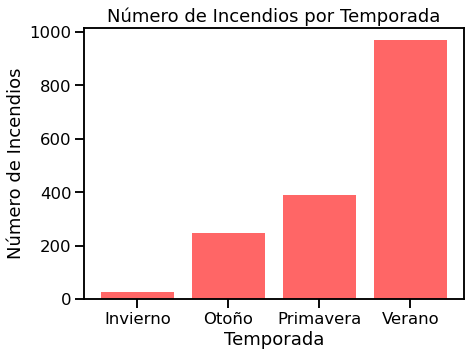

In [21]:
y = list(reversed(list(ninc["Incendios"])))
x=list(reversed(list(ninc["index"])))
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar(x, y, align='center', color="r", alpha=0.6)
plt.xticks()
plt.xlabel("Temporada")
plt.ylabel('Número de Incendios')
plt.title("Número de Incendios por Temporada")
plt.show()

###### La celda a continuación se demora bastante por si se prefiere comentar

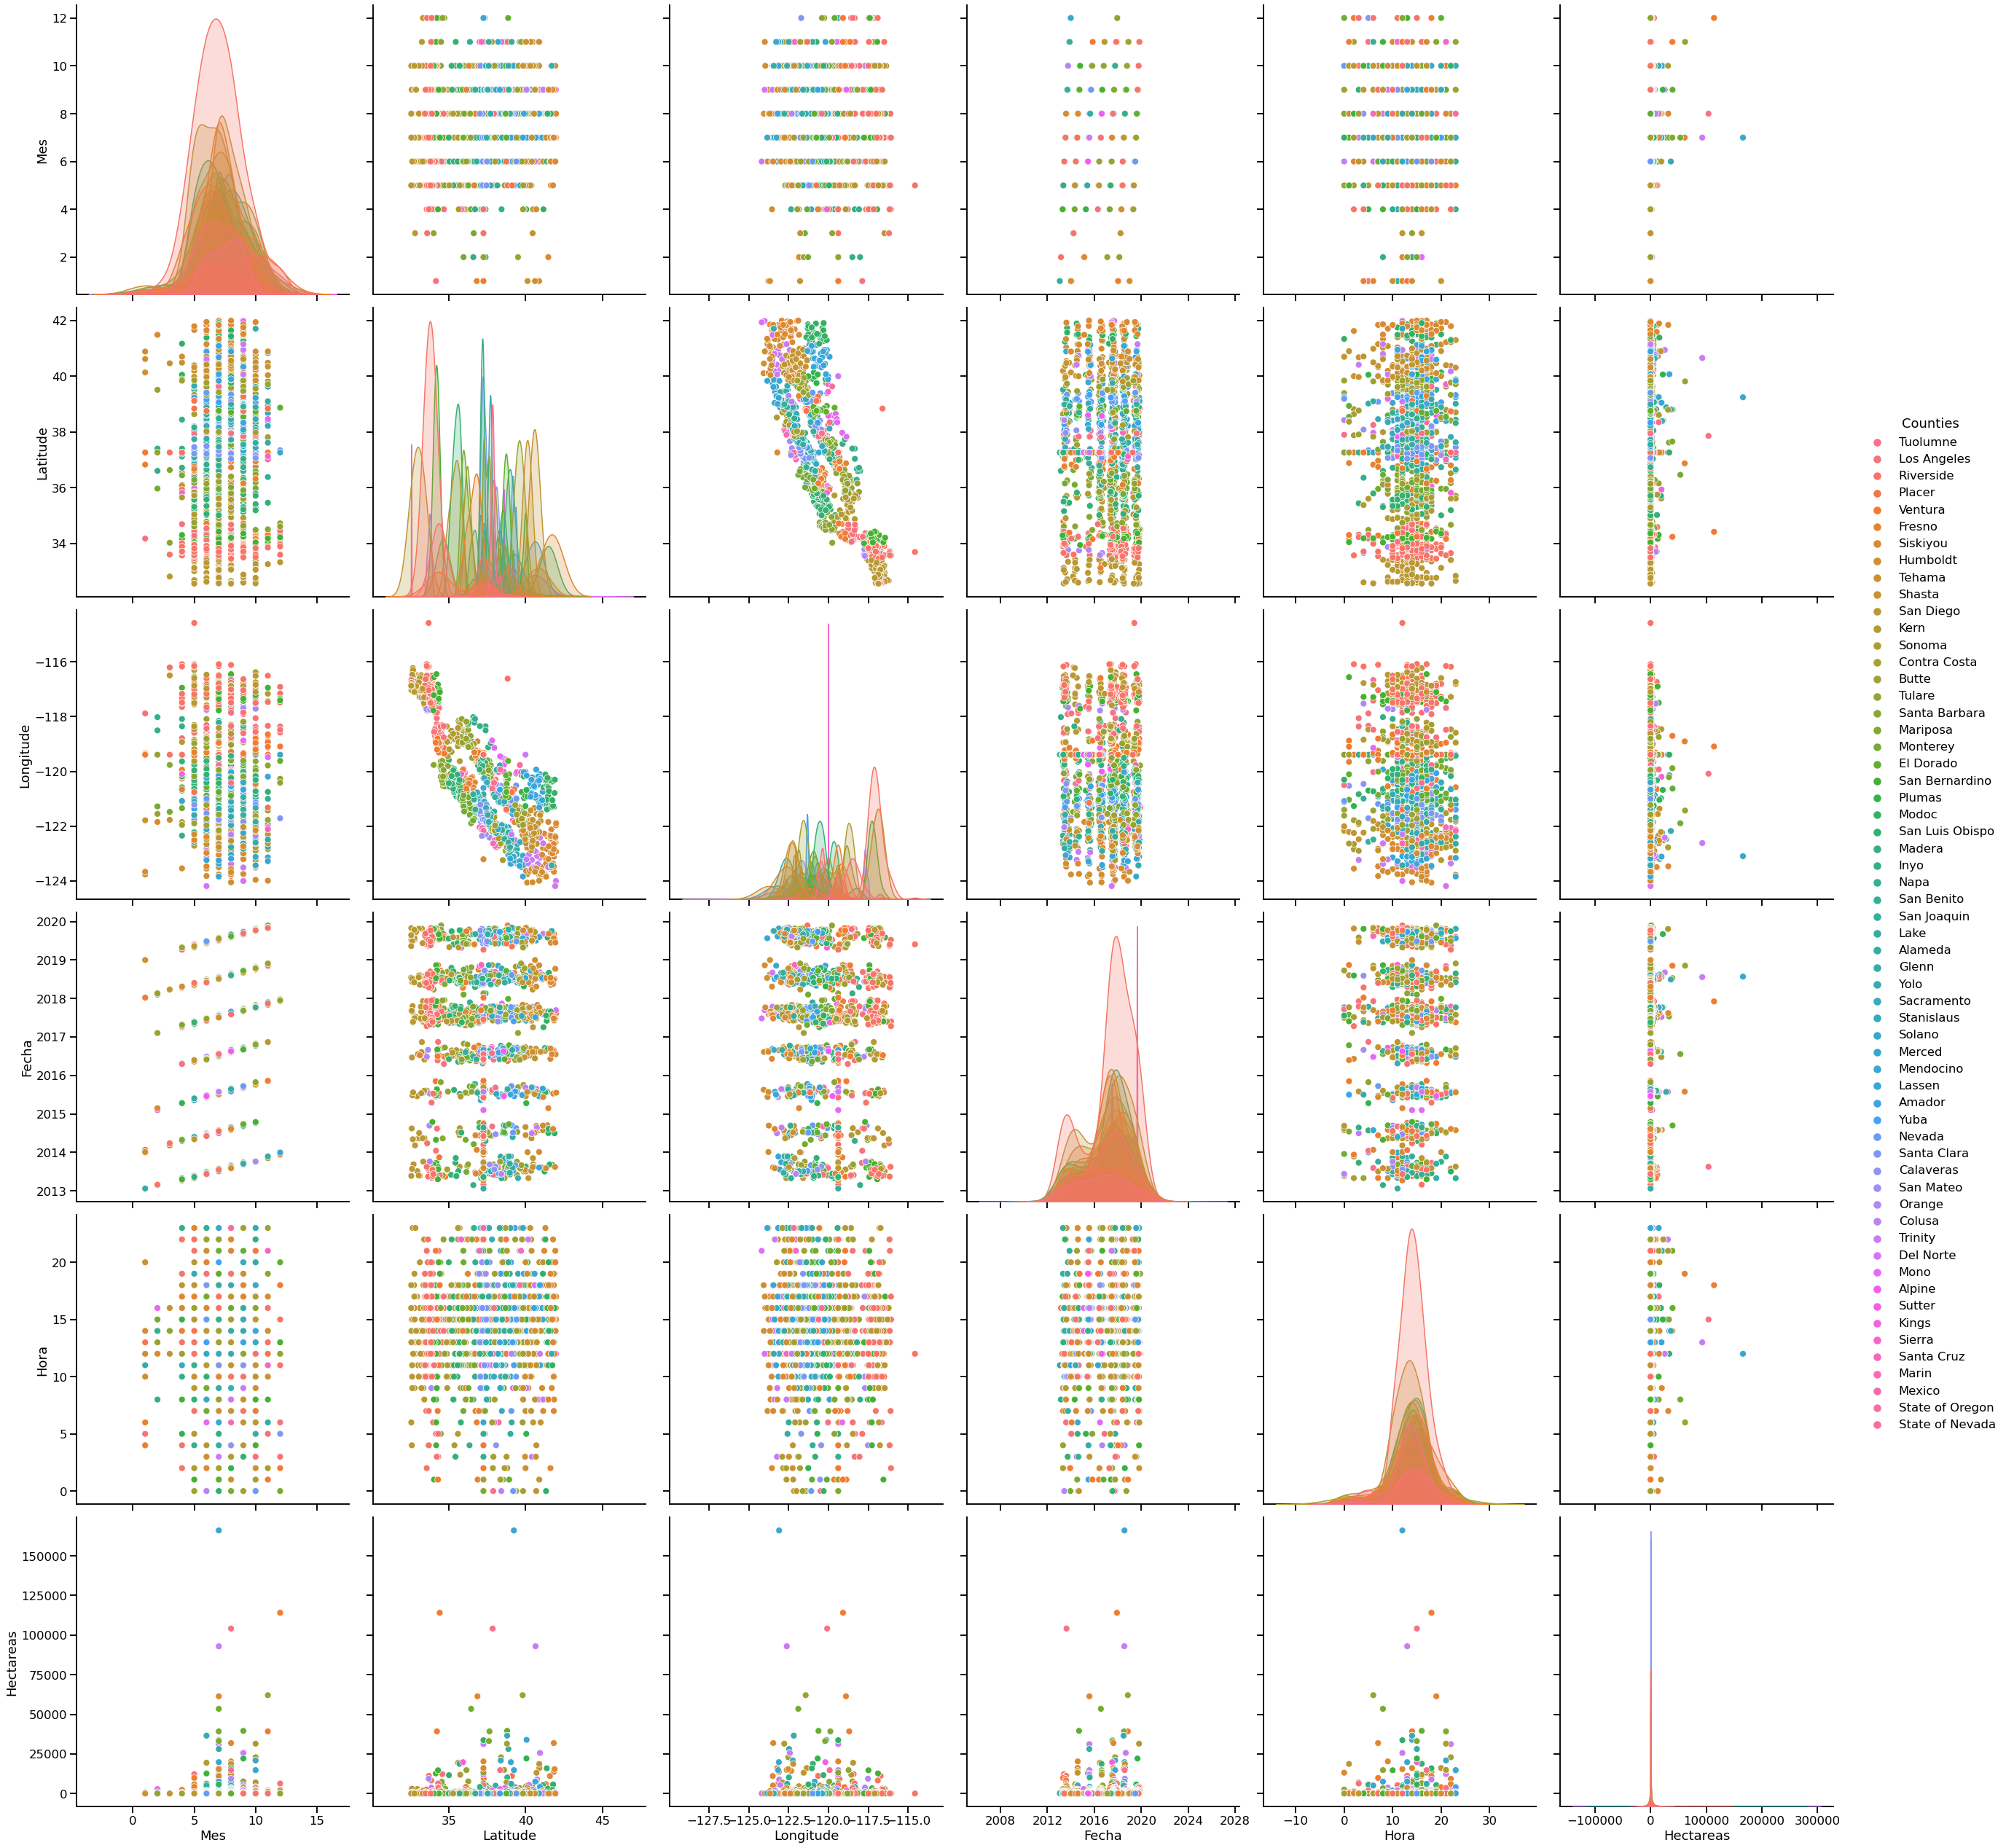

In [114]:
#Se hace un pairplot (en vez de scatter matrix para visualizar relaciones entre las variables)
sns.pairplot(Fire, hue="Counties", vars= ["Mes", "Latitude", "Longitude", "Fecha", "Hora","Hectareas"], height=6)

## 4. Preprocesamiento (20 puntos)


#### Se eliminan columnas con demasiados datos nulos, erróneas

In [23]:
Fire=Fire.drop(['AirTankers','ConditionStatement','ControlStatement','CrewsInvolved','Dozers',
                'Engines','FuelType','Helicopters','WaterTenders','Fatalities','Injuries',
                'PersonnelInvolved','StructuresDamaged','StructuresDestroyed','StructuresThreatened',
                'StructuresEvacuated','AdminUnit','CanonicalUrl','SearchDescription','SearchKeywords',
                'UniqueId','Featured','Location','Name','PercentContained','Public','MajorIncident',
                "ArchiveYear",'Status','Active', "Updated", "CalFireIncident", "Final"], axis=1)
Fire.head()

Counties CountyIds              Extinguished   Latitude   Longitude  \
0     Tuolumne        55 2013-09-06 18:30:00+00:00  37.857000 -120.086000   
1  Los Angeles        19 2013-06-08 18:30:00+00:00  34.585595 -118.423176   
2    Riverside        33 2013-07-30 18:00:00+00:00  33.709500 -116.728850   
3       Placer        31 2013-08-30 08:00:00+00:00  39.120000 -120.650000   
4      Ventura        56 2013-05-11 06:30:00+00:00   0.000000    0.000000   

                Started      Hectareas  Mes   Año  Hora      Fecha   Estacion  
0  2013-08-17T15:25:00Z  104129.335114    8  2013    15 2013-08-17     Verano  
1  2013-05-30T15:28:00Z   12251.224151    5  2013    15 2013-05-30  Primavera  
2  2013-07-15T13:43:00Z   11141.192182    7  2013    13 2013-07-15     Verano  
3  2013-08-10T16:30:00Z   11104.366476    8  2013    16 2013-08-10     Verano  
4  2013-05-02T07:01:00Z    9813.848084    5  2013     7 2013-05-02  Primavera

### Balanceo de datos

El problema de desbalance de datos es más común que se de en problemas de clasificación, para nuestro caso tenemos un problema de regresión en el cual no contamos con una desproporción evidente de datos que nos pueda generar un problema de desbalanceo.

<div id='inp' />

### Inputación de datos faltantes

#### Rangos aproximados de latitud y longitud en grados decimales
El rango de latitud de California es app. desde 32.5121 a 42.0126, promedio igual a 37.26235 <br> 
Y el rango de longitud desde -114.1315 a -124.6509, promedio igual a -119.3912


In [24]:
Fire['Latitude'].sort_values()

1212    -120.258000
569        0.000000
453        0.000000
447        0.000000
436        0.000000
           ...     
1034     117.138741
822      117.337331
228      120.679019
249      121.999000
528     5487.000000
Name: Latitude, Length: 1634, dtype: float64

In [25]:
Fire['Longitude'].sort_values()

945    -124.196290
349    -124.072042
599    -124.058040
904    -124.011680
1352   -124.001849
           ...    
228      38.178241
249      38.453000
213      40.340000
405      41.460000
474     118.908200
Name: Longitude, Length: 1634, dtype: float64

In [26]:
Fire1=Fire.query("Longitude > -114.1315") #Se ven los datos fuera de rango
Fire1

Counties CountyIds              Extinguished  Latitude  Longitude  \
4           Ventura        56 2013-05-11 06:30:00+00:00       0.0        0.0   
27         Monterey        27 2013-12-20 20:00:00+00:00       0.0        0.0   
44        Riverside        33 2013-03-02 19:00:00+00:00       0.0        0.0   
48             Lake        17 2013-01-23 10:15:00+00:00       0.0        0.0   
56            Glenn        11 2013-06-17 09:00:00+00:00       0.0        0.0   
...             ...       ...                       ...       ...        ...   
1143           Kern        15 2019-01-04 10:25:00+00:00       0.0        0.0   
1284         Tulare        54 2019-01-03 09:44:00+00:00       0.0        0.0   
1368  Santa Barbara     42,56 2019-01-03 09:43:00+00:00       0.0        0.0   
1369        Ventura     42,56 2019-01-03 09:43:00+00:00       0.0        0.0   
1580      Riverside        33 2019-04-10 10:23:00+00:00       0.0        0.0   

                   Started    Hectareas  Mes   Año  Hora      Fecha   Estacion  
4     2013-05-02T07:01:00Z  9813.848084    5  2013     7 2013-05-02  Primavera  
27    2013-12-16T00:20:00Z   371.089798   12  2013     0 2013-12-16      Otoño  
44    2013-02-28T16:43:00Z   125.854882    2  2013    16 2013-02-28   Invierno  
48    2013-01-22T11:08:00Z   119.784711    1  2013    11 2013-01-22   Invierno  
56    2013-06-12T15:17:00Z    91.457246    6  2013    15 2013-06-12  Primavera  
...                    ...          ...  ...   ...   ...        ...        ...  
1143  2018-05-16T16:30:00Z   118.570677    5  2018    16 2018-05-16  Primavera  
1284  2018-02-18T13:45:00Z    13.354377    2  2018    13 2018-02-18   Invierno  
1368  2018-01-09T04:00:00Z     0.000000    1  2018     4 2018-01-09   Invierno  
1369  2018-01-09T04:00:00Z     0.000000    1  2018     4 2018-01-09   Invierno  
1580  2019-04-09T22:18:00Z    12.140342    4  2019    22 2019-04-09  Primavera  

[163 rows x 12 columns]

In [27]:
Fire2=Fire.query("Longitude < -124.6509") #Se ven los datos fuera de rango
Fire2

Empty DataFrame
Columns: [Counties, CountyIds, Extinguished, Latitude, Longitude, Started, Hectareas, Mes, Año, Hora, Fecha, Estacion]
Index: []

In [28]:
Fire3=Fire.query("Latitude >= 42.0126")  #Se ven los datos fuera de rango
Fire3
# 10 valores fuera de rango

Counties CountyIds              Extinguished     Latitude  \
165          Siskiyou        47 2014-08-18 09:45:00+00:00    42.048000   
228         Calaveras         5 2014-06-21 19:00:00+00:00   120.679019   
249            Solano        48 2014-06-13 08:00:00+00:00   121.999000   
311              Lake        17 2015-09-08 19:28:00+00:00    55.230000   
528        San Benito        35 2016-07-10 19:30:00+00:00  5487.000000   
627          Siskiyou        47 2018-01-09 12:42:00+00:00    42.039000   
822         Riverside        33 2018-01-09 12:49:00+00:00   117.337331   
1034        Riverside        33 2018-01-09 10:34:00+00:00   117.138741   
1423  State of Oregon        61 2019-08-18 16:33:00+00:00    42.033000   
1454           Lassen        18 2019-09-11 18:30:00+00:00    44.734000   

       Longitude               Started     Hectareas  Mes   Año  Hora  \
165  -122.345000  2014-07-30T23:00:00Z  14285.945530    7  2014    23   
228    38.178241  2014-06-20T15:27:00Z     48.561369    6  2014    15   
249    38.453000  2014-06-12T14:29:00Z     28.327466    6  2014    14   
311  -122.000000  2015-09-02T14:57:00Z    272.348347    9  2015    14   
528  -120.841536  2016-07-09T12:43:00Z     38.444417    7  2016    12   
627  -123.218000  2017-08-14T14:00:00Z  16071.789891    8  2017    14   
822    34.015742  2017-08-31T10:13:00Z     34.397637    8  2017    10   
1034   33.939428  2017-06-16T14:51:00Z      4.046781    6  2017    14   
1423 -122.175000  2019-08-09T23:08:25Z    526.486180    8  2019    23   
1454 -120.606000  2019-09-06T13:20:00Z    105.216300    9  2019    13   

          Fecha   Estacion  
165  2014-07-30     Verano  
228  2014-06-20  Primavera  
249  2014-06-12  Primavera  
311  2015-09-02     Verano  
528  2016-07-09     Verano  
627  2017-08-14     Verano  
822  2017-08-31     Verano  
1034 2017-06-16  Primavera  
1423 2019-08-09     Verano  
1454 2019-09-06     Verano

In [29]:
Fire4=Fire.query("Latitude < 32.5121") #Otros datos fuera de rango
Fire4

Counties CountyIds              Extinguished  Latitude  \
4             Ventura        56 2013-05-11 06:30:00+00:00     0.000   
27           Monterey        27 2013-12-20 20:00:00+00:00     0.000   
44          Riverside        33 2013-03-02 19:00:00+00:00     0.000   
48               Lake        17 2013-01-23 10:15:00+00:00     0.000   
56              Glenn        11 2013-06-17 09:00:00+00:00     0.000   
...               ...       ...                       ...       ...   
1212  San Luis Obispo        40 2019-01-04 08:58:00+00:00  -120.258   
1284           Tulare        54 2019-01-03 09:44:00+00:00     0.000   
1368    Santa Barbara     42,56 2019-01-03 09:43:00+00:00     0.000   
1369          Ventura     42,56 2019-01-03 09:43:00+00:00     0.000   
1580        Riverside        33 2019-04-10 10:23:00+00:00     0.000   

      Longitude               Started    Hectareas  Mes   Año  Hora  \
4         0.000  2013-05-02T07:01:00Z  9813.848084    5  2013     7   
27        0.000  2013-12-16T00:20:00Z   371.089798   12  2013     0   
44        0.000  2013-02-28T16:43:00Z   125.854882    2  2013    16   
48        0.000  2013-01-22T11:08:00Z   119.784711    1  2013    11   
56        0.000  2013-06-12T15:17:00Z    91.457246    6  2013    15   
...         ...                   ...          ...  ...   ...   ...   
1212   -120.258  2018-09-29T09:30:00Z    32.374246    9  2018     9   
1284      0.000  2018-02-18T13:45:00Z    13.354377    2  2018    13   
1368      0.000  2018-01-09T04:00:00Z     0.000000    1  2018     4   
1369      0.000  2018-01-09T04:00:00Z     0.000000    1  2018     4   
1580      0.000  2019-04-09T22:18:00Z    12.140342    4  2019    22   

          Fecha   Estacion  
4    2013-05-02  Primavera  
27   2013-12-16      Otoño  
44   2013-02-28   Invierno  
48   2013-01-22   Invierno  
56   2013-06-12  Primavera  
...         ...        ...  
1212 2018-09-29      Otoño  
1284 2018-02-18   Invierno  
1368 2018-01-09   Invierno  
1369 2018-01-09   Invierno  
1580 2019-04-09  Primavera  

[156 rows x 12 columns]

- En cuanto a latitud se observa que hay 166 datos fuera de rango. <br>
- En cuanto a la longitud se observa que hay 163 datos fuera de rango. <br>
La razón de estos errores se pudo haber generado por falta de información o error de tipeo. <br>
Al no tener muchos datos para realizar la evaluación, mantendremos estos datos pero realizaremos una inputación de datos con el promedio de cada variable para reemplazar estos valores

In [30]:
# El rango de latitud de California es app. desde 32.5121 a 42.0126, promedio igual a 37.26235 <br> 
# Y el rango de longitud desde -114.1315 a -124.6509, promedio igual a -119.3912
def latitude_fix(df):
    if df< 32.51210 or df> 42.0126:
        return 37.26235
    return df

def longitude_fix(df):
    if df< -124.6509 or df> -114.1315:
        return -119.3912
    return df

Fire["Latitude"]=Fire.apply(lambda x: latitude_fix(x['Latitude']), axis=1);
Fire['Longitude']=Fire.apply(lambda x: longitude_fix(x['Longitude']), axis=1);

In [31]:
Latitudev=Fire.loc[(Fire["Latitude"]>32.51) & (Fire["Latitude"]<42.0126)]
pd.unique(Latitudev["Latitude"]).shape

(1427,)

In [32]:
Longitudv=Fire.loc[(Fire["Longitude"]>-124.6509) & (Fire["Longitude"]<-114.1315)]
pd.unique(Longitudv["Longitude"]).shape


(1437,)

#### Se definen variables para escalamiento y posterior trabajo sin variables categóricas

* Se crea `X_p` con las columnas a analizar del dataframe
* Se crea la variable `y` con la columna a predecir de hectáreas
* Se define el transformer a utilizar que es `StandarScaler` a estandarizar solo las variables numéricas
* Se define `X` como la transformación de `X_p` con el scaler.  

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [34]:
Fire

Counties CountyIds              Extinguished   Latitude   Longitude  \
0        Tuolumne        55 2013-09-06 18:30:00+00:00  37.857000 -120.086000   
1     Los Angeles        19 2013-06-08 18:30:00+00:00  34.585595 -118.423176   
2       Riverside        33 2013-07-30 18:00:00+00:00  33.709500 -116.728850   
3          Placer        31 2013-08-30 08:00:00+00:00  39.120000 -120.650000   
4         Ventura        56 2013-05-11 06:30:00+00:00  37.262350 -119.391200   
...           ...       ...                       ...        ...         ...   
1631    Riverside        33 2019-10-10 18:11:00+00:00  33.827979 -117.499619   
1632       Nevada        29 2019-06-28 17:33:00+00:00  39.409722 -121.000556   
1633         Yolo        57                       NaT  38.734634 -121.729691   
1634    San Diego        37                       NaT  33.351145 -117.403719   
1635    Riverside        33                       NaT  33.451480 -116.058980   

                   Started      Hectareas  Mes   Año  Hora      Fecha  \
0     2013-08-17T15:25:00Z  104129.335114    8  2013    15 2013-08-17   
1     2013-05-30T15:28:00Z   12251.224151    5  2013    15 2013-05-30   
2     2013-07-15T13:43:00Z   11141.192182    7  2013    13 2013-07-15   
3     2013-08-10T16:30:00Z   11104.366476    8  2013    16 2013-08-10   
4     2013-05-02T07:01:00Z    9813.848084    5  2013     7 2013-05-02   
...                    ...            ...  ...   ...   ...        ...   
1631  2019-10-10T12:08:00Z       3.642103   10  2019    12 2019-10-10   
1632  2019-06-28T15:03:04Z       0.809356    6  2019    15 2019-06-28   
1633  2019-11-25T12:02:02Z            NaN   11  2019    12 2019-11-25   
1634  2019-10-22T19:20:44Z            NaN   10  2019    19 2019-10-22   
1635  2019-10-14T15:32:20Z            NaN   10  2019    15 2019-10-14   

       Estacion  
0        Verano  
1     Primavera  
2        Verano  
3        Verano  
4     Primavera  
...         ...  
1631      Otoño  
1632     Verano  
1633      Otoño  
1634      Otoño  
1635      Otoño  

[1634 rows x 12 columns]

In [35]:
Fire.dropna(subset=["Hectareas"], inplace=True) 


In [36]:
Fire=Fire.replace(np.nan, 0)

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
Fireencoded=Fire.drop(axis=1, columns=["Extinguished","Started","Fecha","CountyIds"])
categorical_columns = ["Counties", "Estacion"]
numerical_columns = ["Latitude", "Longitude", "Mes","Año","Hora"]

preprocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), categorical_columns),
    remainder='passthrough'    #"omite" los datos no utilizados en vez de dropearlos
)

X_p2 = preprocessor.fit_transform(Fireencoded).toarray()
X_p2, X_p2.shape



(array([[   0.,    0.,    0., ...,    8., 2013.,   15.],
        [   0.,    0.,    0., ...,    5., 2013.,   15.],
        [   0.,    0.,    0., ...,    7., 2013.,   13.],
        ...,
        [   0.,    0.,    0., ...,    4., 2019.,   12.],
        [   0.,    0.,    0., ...,   10., 2019.,   12.],
        [   0.,    0.,    0., ...,    6., 2019.,   15.]]),
 (1631, 69))

In [38]:
Fire['CountyIds'] = Fire['CountyIds'].astype(str).replace(to_replace=',',value="", regex=True) #.str[0:2]
Fire["CountyIds"]=Fire["CountyIds"].astype(int)

In [39]:
# #Inicialmente habían , en la columna y valores repetidos que no permitían pasar a int
# print(sorted(Fire["CountyIds"]))         

In [40]:
#Se arreglan las estaciones a data numérica:
di={"Verano":1, "Primavera":2, "Invierno":3, "Otoño":4}
X_p = Fire.drop(axis=1, columns=["Hectareas","Counties","Extinguished","Started","Fecha"])  #Se borran datos que obstaculizan procesamiento
X_pshow=X_p.replace({"Estacion":di})
X_p=X_pshow.values                 #Se conservan "CountyIds","Latitude","Longitude", "Hora", "Mes", "Dia",
X_pshow, X_p.shape


(      CountyIds   Latitude   Longitude  Mes   Año  Hora  Estacion
 0            55  37.857000 -120.086000    8  2013    15         1
 1            19  34.585595 -118.423176    5  2013    15         2
 2            33  33.709500 -116.728850    7  2013    13         1
 3            31  39.120000 -120.650000    8  2013    16         1
 4            56  37.262350 -119.391200    5  2013     7         2
 ...         ...        ...         ...  ...   ...   ...       ...
 1628          4  39.423833 -121.579738    7  2019    14         1
 1629         47  41.946220 -122.401570    6  2019    20         2
 1630          4  39.839580 -121.957000    4  2019    12         2
 1631         33  33.827979 -117.499619   10  2019    12         4
 1632         29  39.409722 -121.000556    6  2019    15         1
 
 [1631 rows x 7 columns],
 (1631, 7))

In [41]:
y = Fire['Hectareas'].tolist()
len(y)

1631

In [42]:
# print(sorted(y)) Se revisan los valores de y

In [43]:
scaler = StandardScaler()   #Transformador a utilizar
scaler.fit(X_p)
X = scaler.transform(X_p)
X

array([[-0.07021118,  0.246283  ,  0.06942734, ..., -1.95365149,
         0.27131727, -0.67933549],
       [-0.07030385, -1.10740833,  0.9347401 , ..., -1.95365149,
         0.27131727,  0.26044075],
       [-0.07026781, -1.46993214,  1.81644611, ..., -1.95365149,
        -0.23097384, -0.67933549],
       ...,
       [-0.07034246,  1.06666487, -0.9042176 , ...,  1.29944252,
        -0.4821194 ,  0.26044075],
       [-0.07026781, -1.42090612,  1.41534758, ...,  1.29944252,
        -0.4821194 ,  2.13999322],
       [-0.07027811,  0.88879183, -0.40649591, ...,  1.29944252,
         0.27131727, -0.67933549]])

In [44]:
print('Promedio: ', X.mean().round())  #Debe dar 0
print('Desviación Estandar:',np.std(X)) #Debe dar 1

Promedio:  0.0
Desviación Estandar: 1.0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) #Se evaluará el tamaño del test según el ajuste del modelo

## 5. Selección de modelo (35 puntos)


### Lasso y Ridge


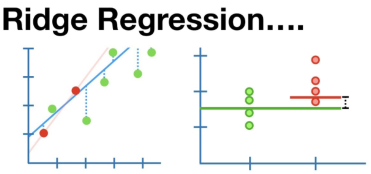

In [46]:
Ridge= Image.open(Path().resolve().parent / "images" / "RidgeRegression.png").reduce(2)
Ridge

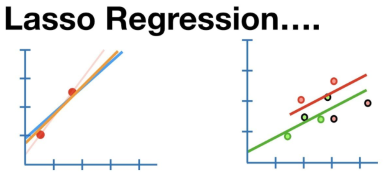

In [47]:
Lasso= Image.open(Path().resolve().parent / "images" / "LassoRegression.png").reduce(2)
Lasso

In [48]:
from sklearn.linear_model import Ridge

In [49]:
np.any(np.isnan(X_train)), np.all(np.isfinite(X_train))

(False, True)

In [50]:
np.any(np.isnan(y_train)), np.all(np.isfinite(y_train))

(False, True)

La regresión Lasso es similar a Ridge pero la regularización es respecto a una norma $l_1$.

In [53]:
from sklearn.linear_model import Lasso

### SUPPORT VECTOR REGRESSION (SVR) 

El método de Support Vector Classification se puede ampliar para resolver problemas de regresión. Este método se llama  Support Vector Regression (SVR). 

El modelo producido por SVR depende solo de un subconjunto de los datos de entrenamiento, porque la función de costo para construir el modelo no se preocupa por los puntos de entrenamiento que se encuentran más allá del margen. De manera análoga, el modelo producido por SVR depende solo de un subconjunto de los datos de entrenamiento, porque la función de costo ignora las muestras cuya predicción está cerca de su objetivo. 

Hay tres implementaciones diferentes de Support Vector Regression: SVR, NuSVR y LinearSVR. El LinearSVR proporciona una implementación más rápida que SVR pero solo considera el kernel lineal, mientras que NuSVR implementa una formulación ligeramente diferente a SVR y LinearSVR.  

Al igual que con las clases de clasificación, el método de ajuste tomará como argumentos los vectores, solo que en este caso se espera que tenga valores de punto flotante en lugar de valores enteros. 

Hiperparámetros para SVR 

Se determinarán los mejores hiperparámetros kernel, C y gamma. 

Ejemplo (de Juguete) de regresión 1D utilizando Kernels lineales, polinomiales y RBF. 

<img src="https://s1.qwant.com/thumbr/0x380/2/9/3b091a87961a5095eefa47f4900f43f53f980bb0ec18af6496284473d7c312/0*xZjrNjcCtqGLrLMi.png?u=https%3A%2F%2Fmiro.medium.com%2Fmax%2F600%2F0%2AxZjrNjcCtqGLrLMi.png&q=0&b=1&p=0&a=1" width="500" alt="SVR" align="left"/>


In [56]:
from sklearn.svm import SVR

### DECISION TREES (DT)

Los árboles de decisión (DT) son un método de aprendizaje supervisado no paramétrico que se utiliza para clasificación y regresión. El objetivo es crear un modelo que prediga el valor de una variable objetivo aprendiendo reglas de decisión simples inferidas de las características de los datos. Un árbol puede verse como una aproximación constante a trozos.

Por ejemplo, en el ejemplo siguiente, los árboles de decisión aprenden de los datos para aproximar una curva sinusoidal con un conjunto de reglas de decisión si-entonces-si no. Cuanto más profundo es el árbol, más complejas son las reglas de decisión y más ajustado es el modelo.
Los árboles de decisión también se pueden aplicar a problemas de regresión, utilizando la clase DecisionTreeRegressor.

<img src="https://s1.qwant.com/thumbr/0x380/2/3/dea8136138fb3dd035e613eb961a3242d41f0fb55a1234ac060054389de8a1/sphx_glr_plot_tree_regression_001.png?u=https%3A%2F%2Fscikit-learn.org%2Fstable%2F_images%2Fsphx_glr_plot_tree_regression_001.png&q=0&b=1&p=0&a=1" width="500" alt="SVR" align="left"/>


<img src="https://aichamp.files.wordpress.com/2017/03/gbm-tree-infographic.png?w=680" width="900" alt="SVR" align="left"/>



In [59]:
from sklearn import tree
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

## 6. Métricas y análisis de resultados (10 puntos)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

#### Resultados modelo Ridge y Lasso

In [51]:
Ridgefitted=Ridge(alpha=0.1).fit(X_train, y_train)

In [52]:
Ridgefitted.predict(X_test)[:10]

array([ 522.21474022, 1784.81971456, 1464.88873734, 3597.4840089 ,
       1442.59160854,  287.97953614, 1326.74556728, 1686.8038689 ,
        399.89722312, 2691.98243658])

In [61]:
mean_squared_error(Ridgefitted.predict(X_test), y_test)

116092965.47826047

In [62]:
Ridge_e = Ridge(alpha=0.1)

In [63]:
Ridgecross = cross_validate(Ridge_e, X_train, y_train, cv=10)  # defaults to 5-fold CV

In [64]:
Ridgecross["test_score"]

array([-0.75067139,  0.01021487, -0.01034817,  0.54301859,  0.52243019,
       -0.48571188, -0.5022817 , -1.58864858,  0.46518913, -0.20688612])

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {
    "alpha": np.arange(0, 1, 0.001)
}

search = GridSearchCV(
    estimator=Ridge_e,
    param_grid=param_grid
)

search.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(alpha=0.1),
             param_grid={'alpha': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0....
       0.936, 0.937, 0.938, 0.939, 0.94 , 0.941, 0.942, 0.943, 0.944,
       0.945, 0.946, 0.947, 0.948, 0.949, 0.95 , 0.951, 0.952, 0.953,
       0.954, 0.955, 0.956, 0.957, 0.958, 0.959, 0.96 , 0.961, 0.962,
       0.963, 0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 , 0.971,
       0.972, 0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98 ,
       0.981, 0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989,
       0.99 , 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998,
       0.999])})

El objeto `search` ahora es equivalente a un estimator `Ridge` pero con los mejores parámetros encontrados (`alpha` = 0).

In [67]:
search.score(X_test, y_test)

0.3085348234921229

In [68]:
search.best_params_

{'alpha': 0.999}

In [54]:
lassoe = Lasso(alpha=0.1)

In [55]:
lassoe.fit(X_train, y_train)

Lasso(alpha=0.1)

In [69]:
lassoe.score(X_test, y_test)

0.3085404521299986

In [70]:
Lassocross = cross_validate(lassoe, X_train, y_train, cv=10) 
Lassocross["test_score"]

array([-0.75063707,  0.01020947, -0.01032822,  0.54304574,  0.52245987,
       -0.48568807, -0.50235915, -1.58892035,  0.46518873, -0.20688986])

In [71]:
ridge = Ridge()
lasso = Lasso()

In [72]:
ridge_grid = {"alpha": np.arange(0.1, 10, 0.05)}

ridge_cv = GridSearchCV(
    estimator=ridge,
    param_grid=ridge_grid
)

ridge_cv.fit(X_train, y_train)
ridge_cv.best_params_

{'alpha': 9.950000000000003}

In [73]:
lasso_grid = {"alpha": np.arange(0.1, 10, 0.05)}

lasso_cv = GridSearchCV(
    estimator=lasso,
    param_grid=lasso_grid
)

lasso_cv.fit(X_train, y_train)
lasso_cv.best_params_

{'alpha': 9.950000000000003}

In [74]:
ridge_cv.score(X_test, y_test)

0.30846185122898284

In [75]:
lasso_cv.score(X_test, y_test)

0.30847947082762084

#### SVR

In [57]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

In [58]:
svr_rbf = svr_rbf.fit(X_train, y_train)

In [76]:
svr_rbf.score(X_test, y_test)

-0.026099619002147634

In [77]:
y_pred = svr_rbf.predict(X_test) 

In [78]:
r2_score(y_test, y_pred)

-0.026099619002147634

In [79]:
svr_rbf = cross_validate(svr_rbf,X_train,y_train,cv=5)

In [80]:
print(f'Support Vector Regression Cross Validation precision score: {np.mean(svr_rbf["test_score"]):.2f} +/- {np.std(svr_rbf["test_score"]):.2f}')

Support Vector Regression Cross Validation precision score: -0.03 +/- 0.02


#### Desicion Tree

In [81]:
DTR = tree.DecisionTreeRegressor()

In [82]:
DTR = DTR.fit(X_train, y_train)

In [83]:
DTR.score(X_test, y_test)

0.6957135845684381

In [84]:
y_pred1 = DTR.predict(X_test)  #Obtengo un vector y de prediccion utilizando los datos de test

In [85]:
r2_score(y_test, y_pred1)

0.6957135845684381

In [86]:
DTR_CV = cross_validate(DTR,X_train,y_train,cv=7)

In [87]:
print(f'Decision Trees Regression Cross Validation precision score: {np.mean(DTR_CV["test_score"]):.2f} +/- {np.std(DTR_CV["test_score"]):.2f}')

Decision Trees Regression Cross Validation precision score: -0.38 +/- 0.64


#### Optimización de hiperparámetros

##### SVR

###### La celda a continuación se demora bastante por si se prefiere comentar

In [112]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2).fit(X_train,y_train)
print(grid.best_estimator_)
warnings.filterwarnings("ignore") 

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  4.2min finished


SVR(C=100, gamma=1, kernel='poly')


##### Árbol de desiciones

In [89]:
model = DecisionTreeRegressor()
#criterion = ['mse','friedman_mse','mae', 'poisson']
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 20),
                                'min_samples_split': range(10, 60, 10)},
                               
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'max_depth': 3, 'min_samples_split': 20}


In [90]:
dec_tree = tree.DecisionTreeRegressor()
pipe = Pipeline(steps=[('dec_tree', dec_tree)])
criterion = ['mse','friedman_mse','mae', 'poisson']
parameters = dict(dec_tree__criterion=criterion)
best_c = GridSearchCV(pipe, parameters, scoring="r2")
best_c.fit(X_train, y_train)
print('Best Criterion:', best_c.best_estimator_.get_params()['dec_tree__criterion'])

Best Criterion: mae


In [91]:
DTR_best = tree.DecisionTreeRegressor(criterion='friedman_mse',max_depth= 18,min_samples_split= 10)

In [92]:
DTR_best = DTR_best.fit(X_train, y_train)

In [93]:
DTR_best.score(X_test, y_test)

0.7759037230009381

In [94]:
y_pred_b = DTR_best.predict(X_test)

In [95]:
r2_score(y_test, y_pred_b)

0.7759037230009381

#### Tiempo de ajuste de los modelos

In [96]:
print(f'Ridge fit time : {np.mean((Ridgecross)["fit_time"]):.10f} +/- {np.std(Ridgecross["fit_time"]):.5f} ')

Ridge fit time : 0.0018483639 +/- 0.00143 


In [97]:
print(f'Lasso fit time : {np.mean((Lassocross)["fit_time"]):.10f} +/- {np.std(Lassocross["fit_time"]):.5f} ')

Lasso fit time : 0.0021218777 +/- 0.00120 


In [98]:
print(f'SVR fit time : {np.mean((svr_rbf )["fit_time"]):.10f} +/- {np.std(svr_rbf ["fit_time"]):.5f} ')

SVR fit time : 0.1020299435 +/- 0.02166 


In [99]:
print(f'Desicion Tree fit time : {np.mean((cross_validate(DTR,X_train,y_train,cv=7))["fit_time"]):.10f} +/- {np.std(cross_validate(DTR,X_train,y_train,cv=7)["fit_time"]):.5f} ')

Desicion Tree fit time : 0.0085296290 +/- 0.00294 


##### Se nota que el modelo del Árbol de Desiciones fue el que más se demoró

## 7. Visualizaciones del modelo (10 puntos)


In [100]:
X_W = Fire['Hora'].values.reshape(-1, 1)  #Se borran datos categóricos,"Started","Fecha","Estacion"
y_W = Fire['Hectareas'].tolist()

In [101]:
scaler = StandardScaler()   #Transformador a utilizar
scaler.fit(X_W)
Xg = scaler.transform(X_W)

In [102]:
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_W,y_W,test_size=0.1, random_state=42)

In [103]:
DTR_g = tree.DecisionTreeRegressor(criterion='friedman_mse',max_depth= 18,min_samples_split= 10)
DTR_g = DTR_g.fit(X_train_g, y_train_g)

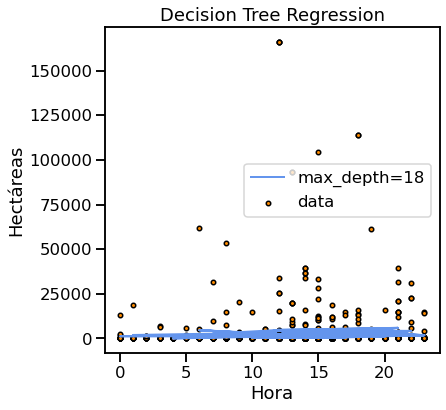

In [104]:
# Predict
y_1 = DTR_g.predict(X_test_g)
# Plot the results
plt.figure(figsize=(6,6))
plt.scatter(X_train_g, y_train_g, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test_g, y_1, color="cornflowerblue",
         label="max_depth=18", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Hora")
plt.ylabel("Hectáreas")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [105]:
X_W = Fire['Latitude'].values.reshape(-1, 1)  #Se borran datos categóricos    ,"Started","Fecha","Estacion"
y_W = Fire['Hectareas'].tolist()

In [106]:
scaler = StandardScaler()   #Transformador a utilizar
scaler.fit(X_W)
Xg = scaler.transform(X_W)

In [107]:
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_W,y_W,test_size=0.1, random_state=42)

In [108]:
DTR_g = tree.DecisionTreeRegressor(criterion='friedman_mse',max_depth= 18,min_samples_split= 10)
DTR_g = DTR_g.fit(X_train_g, y_train_g)

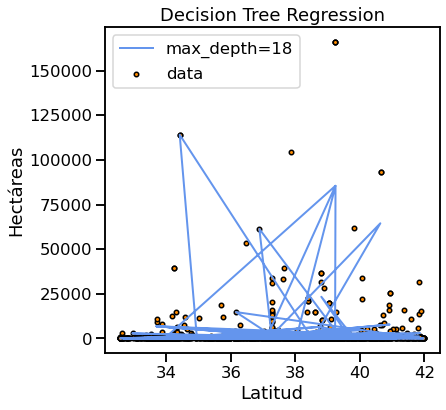

In [109]:
y_1 = DTR_g.predict(X_test_g)
# Plot the results
plt.figure(figsize=(6,6))
plt.scatter(X_train_g, y_train_g, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test_g, y_1, color="cornflowerblue",
         label="max_depth=18", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Latitud")
plt.ylabel("Hectáreas")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

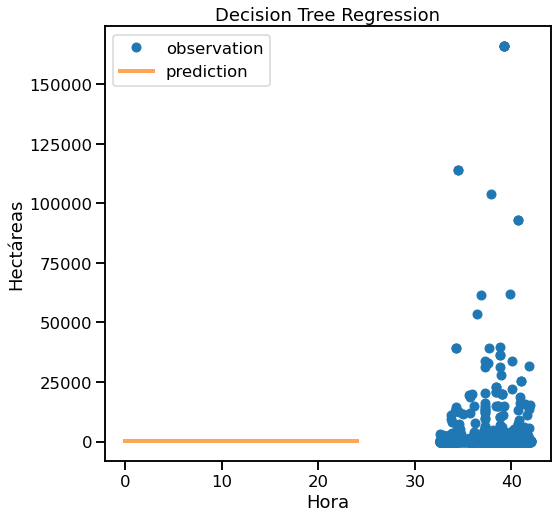

In [110]:
xx = np.array([np.linspace(0, 24, 200)]).T
y_1=DTR_g.predict(xx)

plt.figure(figsize=(8,8))
plt.plot(X_W, y_W, 'o', label='observation')
plt.plot(xx,y_1, linewidth=4, alpha=.7, label='prediction')
plt.xlabel('Hora')
plt.ylabel('Hectáreas')
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

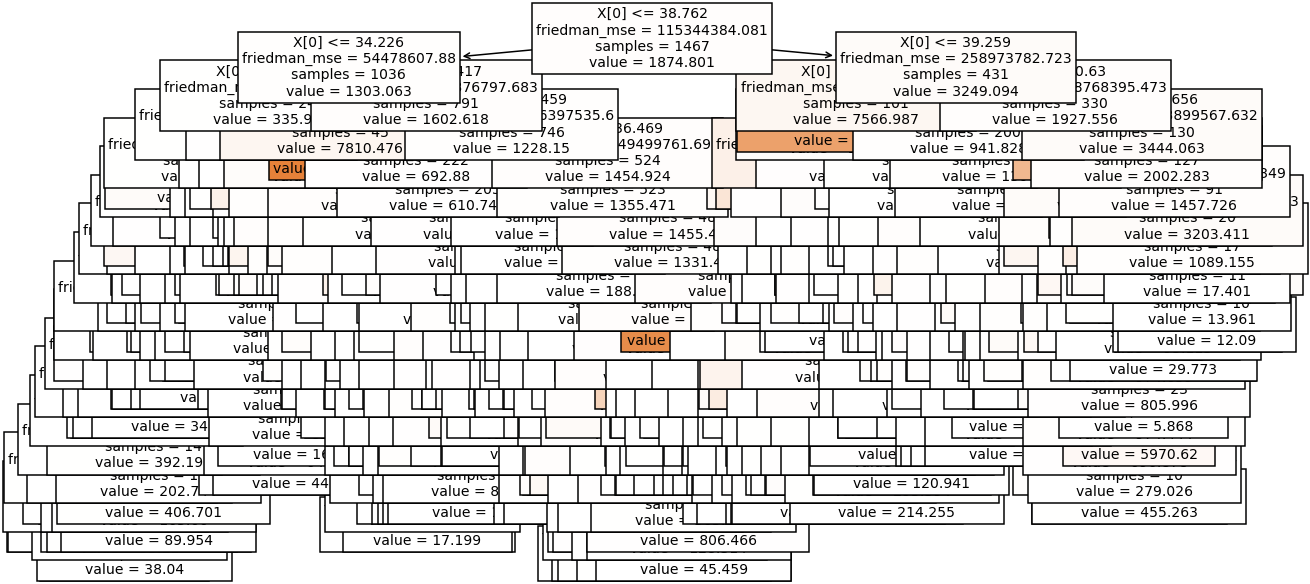

In [111]:
plt.figure(figsize=(20,10))
tree.plot_tree(DTR_g, filled=True, fontsize=14)
warnings.filterwarnings("ignore") 

## 8. Conclusiones (5 puntos)

Se nota que los modelos de regresiones lineales efectuaron predicciones con resultados muy deficientes, y esto fue incluso peor <br>
zcon el modelo realizado con SVR. Por otro lado, la regresión realizada con el árbol de desiciones fue mucho más acertada para <br>
predecir los datos, por lo que fue el modelo elegido. Esto puede ser debido a la dispersión de los datos, y a la naturaleza de <br>
estos, ya que se evaluaron las variables categóricas: Counties y Estación, y las variables continuas: Hora, Mes, Dia, Longitud y <br>
Latitud, obteniendo el valor de 0.77 de score para este último modelo. <br>
Es destacable también mencionar que la optimización de hiperparámetros fue útil también para el último modelo, pero no en gran medida,<br> 
ya que mejoró solo en alrededor de un 7% la presición según el score. <br>
El tiempo de ajuste, fue mayor para el modelo del árbol de desiciones, pero fue un valor muy tolerable de espera, de 0,008 segundos.<br>

Otros modelos que se pudieron estudiar, sería el de TensorFlow, que se utiliza para datos con ambos tipos de variables.